In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as  mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import datetime
import operator
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline
plt.style.use('seaborn')

In [2]:
confirmed_cases = pd.read_csv('time_series_covid_19_confirmed.csv')

In [3]:
deaths = pd.read_csv('time_series_covid_19_deaths.csv')

In [4]:
recovered_cases = pd.read_csv('time_series_covid_19_recovered.csv')

In [5]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,197,238,428,566,673,790,900,1030,1183,1306


In [6]:
for index, row in confirmed_cases.iterrows():
    if row['Country/Region']  == "India":
        print(index)
#confirmed_cases_India=confirmed_cases.loc[confirmed_cases['Country/Region']=="India"]

15


In [7]:
confirmed_dates = confirmed_cases.columns[4:]

In [8]:
deaths_dates = deaths.columns[4:]

In [9]:
recovered_dates = recovered_cases.columns[4:]

In [35]:
total_confirmed=[]
total_deaths=[]
total_recovered=[]
mortality=[]
recovery=[]
india_cases = []
china_cases = [] 
italy_cases = []
us_cases = []
for i in (confirmed_dates):
    total_deaths.append(deaths[i].sum())
    total_confirmed.append(confirmed_cases[i].sum())
    total_recovered.append(recovered_cases[i].sum())
    mortality.append(float(deaths[i].sum()/confirmed_cases[i].sum()))
    recovery.append(float(recovered_cases[i].sum()/confirmed_cases[i].sum()))
    
    
    #Cases based on countries
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())

In [46]:
total_days = np.array([i for i in range(len(confirmed_dates))]).reshape(-1, 1)
total_confirmed = np.array(total_confirmed).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
india_cases = np.array(india_cases).reshape(-1,1)
china_cases = np.array(china_cases).reshape(-1,1)
italy_cases = np.array(italy_cases).reshape(-1,1)
us_cases = np.array(us_cases).reshape(-1,1)

In [37]:
#visualisation
future_days=7 #future week forcasting
future_forcast = np.array([i for i in range(len(confirmed_dates)+future_days)]).reshape(-1, 1)
start_date = datetime.datetime.strptime('1/22/2020', '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(total_days, total_confirmed, test_size=0.15, shuffle=False)

In [39]:
# using this to find the optimal parameters for SVR
c = [0.01]
gamma = [0.1]
epsilon = [0.01]
shrinking = [False]
degree = [5]

svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking, 'degree': degree}

svm = SVR(kernel='poly')
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train, y_train)

C:\Users\skalr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 1 is smaller than n_iter=30. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.3s finished
C:\Users\skalr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=30, n_jobs=-1,
          param_distributions={'C': [0.01], 'gamma': [0.1], 'epsilon': [0.01], 'shrinking': [False], 'degree': [5]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=1)

In [40]:
#svm_confirmed = svm_search.best_params_
print(svm_search)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=30, n_jobs=-1,
          param_distributions={'C': [0.01], 'gamma': [0.1], 'epsilon': [0.01], 'shrinking': [False], 'degree': [5]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=1)


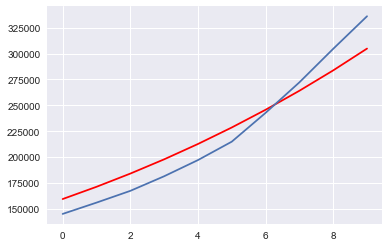

MAE: 15495.471362561872
MSE: 289338382.01160586


In [41]:
svm_pred = svm_search.predict(future_forcast)
svm_test_pred = svm_search.predict(X_test)
plt.plot(svm_test_pred, color='red')
plt.plot(y_test)
plt.show()
print('MAE:', mean_absolute_error(svm_test_pred, y_test))
print('MSE:',mean_squared_error(svm_test_pred, y_test))

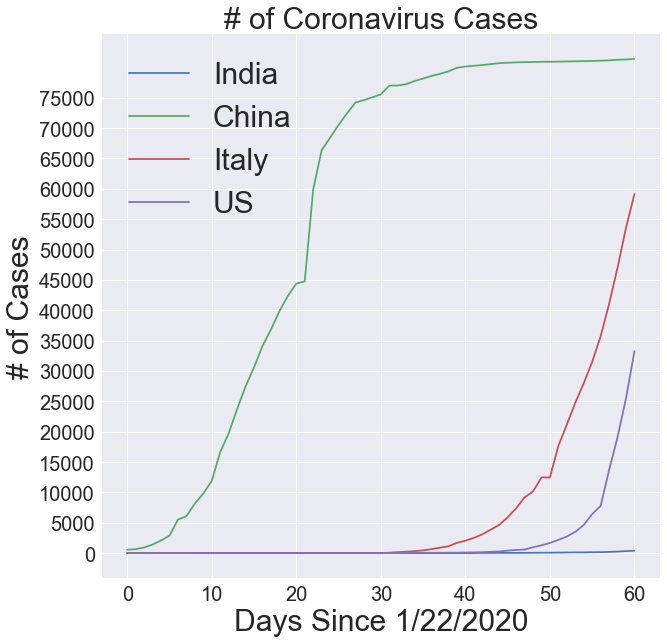

In [82]:
dates_arr = future_forcast[:-7]
plt.figure(figsize=(10, 10))
plt.plot(dates_arr, india_cases)
plt.plot(dates_arr, china_cases)
plt.plot(dates_arr, italy_cases)
plt.plot(dates_arr, us_cases)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['India', 'China', 'Italy', 'US'], prop={'size': 30})
plt.xticks(size=20)
plt.yticks(np.arange(0, 80000, 5000), size=20)
plt.show()

In [63]:
X_train_india, X_test_india, y_train_india, y_test_india = train_test_split(total_days, india_cases, test_size=0.0, shuffle=False)
svm_india_pred=svm_search.fit(X_train_india,y_train_india)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  3.9min finished
C:\Users\skalr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\skalr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60]])

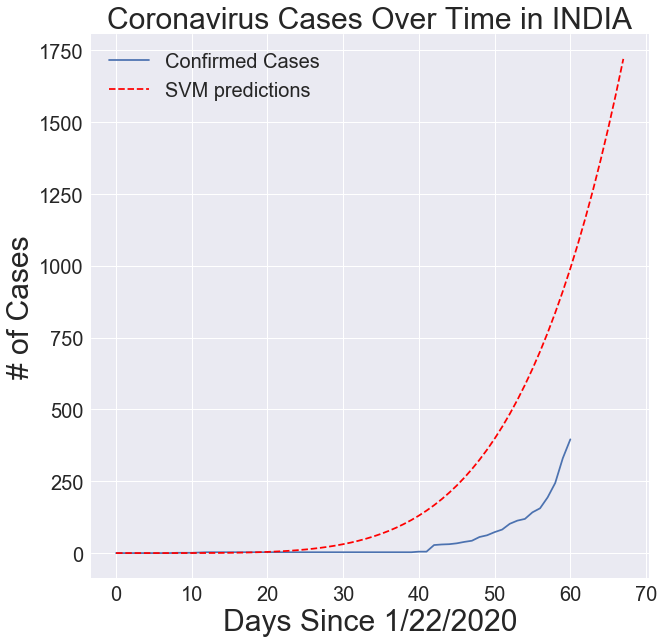

In [83]:
svm_pred_india = svm_india_pred.predict(future_forcast)
plt.figure(figsize=(10, 10))
plt.plot(dates_arr,india_cases)
plt.plot(future_forcast, svm_pred_india, linestyle='dashed', color='red')
plt.title('Coronavirus Cases Over Time in INDIA', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [59]:
print(india_cases)

[[  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  1]
 [  1]
 [  1]
 [  2]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  5]
 [  5]
 [ 28]
 [ 30]
 [ 31]
 [ 34]
 [ 39]
 [ 43]
 [ 56]
 [ 62]
 [ 73]
 [ 82]
 [102]
 [113]
 [119]
 [142]
 [156]
 [194]
 [244]
 [330]
 [396]]
